In [3]:
%run datasets.py

## k-Nearest Neighbors : Classification

In [4]:
#The dataset we are using is a set of points which have either the label 0 or 1.
X, y = make_forge()
print("First 5 rows of X")
print(X[:5]) # first 5 elements
print("First 5 rows of y")
print(y[:5]) # first 5 elements
print("There are", len(X), "elements in X.") 

First 5 rows of X
[[  9.96346605   4.59676542]
 [ 11.0329545   -0.16816717]
 [ 11.54155807   5.21116083]
 [  8.69289001   1.54322016]
 [  8.1062269    4.28695977]]
First 5 rows of y
[1 0 1 0 0]
There are 26 elements in X.


In [5]:
import matplotlib.pyplot as plt

# y contains either 0 or 1 for each point
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Learning a Model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#separating our dataset into a training and a test part
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Kn model
model = KNeighborsClassifier(n_neighbors=3)

In [7]:
# training
model.fit(X_train, y_train)

# evaluation
accuracy  = model.score(X_test, y_test)
print("Accuracy =", accuracy)
print("# Misclassified points =", (1 - accuracy) * len(X_test))

Accuracy = 0.857142857143
# Misclassified points = 1.0


We have an accuracy of 85.7%.

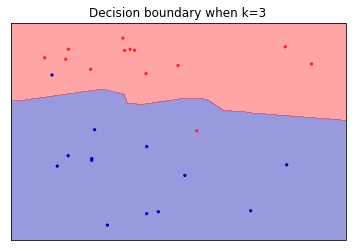

In [8]:
#Boundary

%run plots.py
plot_2d_separator(model, X, y, fill=True, eps=0.5, alpha=0.4)
plt.title("Decision boundary when k=3")
plt.show()


### Real Dataset

In [9]:

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#print(cancer.DESCR) 
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [10]:
print(cancer.data.shape)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

(569, 30)


In [11]:
model_breast = KNeighborsClassifier(n_neighbors=6)
model_breast.fit(X_train, y_train)


accuracy_breast = model_breast.score(X_test, y_test)
print("Accuracy on breast cancer =", accuracy_breast)

Accuracy on breast cancer = 0.923076923077


## k-Nearest Neighbors : Regression

In [12]:
X, y = make_wave(40)

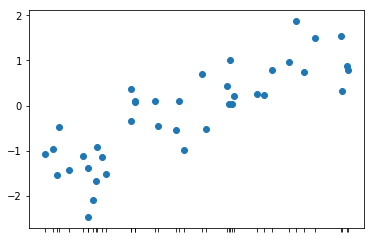

In [13]:
plt.scatter(X, y)
plt.xticks(X, " ")
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsRegressor

# create train + test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# create regression models, train and evaluate
regmodel_2 = KNeighborsRegressor(n_neighbors=2)
regmodel_2.fit(X_train, y_train)
print("Accuracy (k=2)", regmodel_2.score(X_test, y_test))

regmodel_3 = KNeighborsRegressor(n_neighbors=3)
regmodel_3.fit(X_train, y_train)
print("Accuracy (k=3)", regmodel_3.score(X_test, y_test))

regmodel_4 = KNeighborsRegressor(n_neighbors=4)
regmodel_4.fit(X_train, y_train)
print("Accuracy (k=4)", regmodel_4.score(X_test, y_test))

regmodel_5 = KNeighborsRegressor(n_neighbors=5)
regmodel_5.fit(X_train, y_train)
print("Accuracy (k=5)", regmodel_5.score(X_test, y_test))

regmodel_7 = KNeighborsRegressor(n_neighbors=7)
regmodel_7.fit(X_train, y_train)
print("Accuracy (k=7)", regmodel_7.score(X_test, y_test))

print("Best accuracy achieved when k=3")

Accuracy (k=2) 0.655749187554
Accuracy (k=3) 0.834417244625
Accuracy (k=4) 0.770418901846
Accuracy (k=5) 0.707138114401
Accuracy (k=7) 0.675213458768
Best accuracy achieved when k=3


## Linear models

Linear models are mostly used to do regression (predicting a value given a set of features). The predicted value $\hat{y}$ can be written as follows:

\begin{equation*}
\hat{y} = \sum_{k=1}^n w_k \times x_k + b
\end{equation*}

where $x_k$ are the features of the data points, $w_k$ and $b$ are the parameters learned by the linear model.

### Ordinary Least Squares

Ordinary Least Squares is the most classic linear method for regression. This model finds the $w$ and $b$ parameters that minimize the **mean squared error (MSE)** between predictions and the true value for the $m$ points in training dataset.
    
\begin{equation*}
MSE = {1 \over {m}} \sum_{k=1}^m (\hat{y}-y)^2
\end{equation*}

In [15]:
X, y = make_wave(n_samples=80)
print("X has", len(X), "points.")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X has 80 points.


In [16]:
from sklearn.linear_model import LinearRegression
# create model and train it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print("Learned w:", model.coef_)
print("Learned b:", model.intercept_)
#The learned $w$ are in the coef_ attribute while the learned b are in the intercept_ attribute. 
#Since our data only has one feature, we only have one w.

Learned w: [ 0.53507564]
Learned b: 0.0837943622218


In [18]:

print("Model prediction =", model.predict([X_test[0]]))
print("Hand computed prediction =", model.coef_[0] * X_test[0] + model.intercept_)
print("Correct output =", y_test[0])

Model prediction = [ 1.59137414]
Hand computed prediction = [ 1.59137414]
Correct output = 1.05624279582


### Real Dataset

In [19]:
#We are going to predict the price of houses. 
#The data come from the housing market in Boston. We have 506 data points, and each one has 104 features
X, y = load_extended_boston()
print(X.shape)
print(y.shape)

(506, 104)
(506,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
model_house = LinearRegression()
model_house.fit(X_train, y_train)
print("Predicted price =", model_house.predict([X_test[0]]))
print("Real price =", y_test[0])

Predicted price = [ 23.67394352]
Real price = 22.6


In [21]:
print(model_house.score(X_train, y_train))
print(model_house.score(X_test, y_test))
#We are overfitting because our training accuracy is very good but our test accuracy is bad.

0.952352643686
0.605775489294


### Regularization


Sometimes, the linear model can overfit. This means that it will be good on the training set, but not on the test set. One way to control overfitting is to add a regularization to our model. We can add a constraint to the objective being minimized by the model.

A L2 normalization that minimizes the norm 2 of the weights $w$ of the model. The name of this new type of model is called Ridge regression and it minimizes :

$$\begin{equation*}
MSE + Regularization = {1 \over {m}} \sum_{k=1}^m (\hat{y}-y)^2 + \lambda \left\lVert w \right\rVert ^2
\end{equation*}$$
$\lambda$ is a parameter to adjust the effect of regularization.

In [22]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
print("Training accuracy =", model_ridge.score(X_train, y_train))
print("Test accuracy =", model_ridge.score(X_test, y_test))

Training accuracy = 0.88605785604
Test accuracy = 0.752713960031


We have a better test accuracy and less difference between training and test accuracy. This means we have a more accurate model and have reduced the overfitting so this is a good improvement over the model which has no regularization.

In [23]:
model_ridge_01 = Ridge(alpha=0.1)
model_ridge_01.fit(X_train, y_train)
print("Training accuracy (alpha=0.1) =", model_ridge_01.score(X_train, y_train))
print("Test accuracy     (alpha=0.1) =", model_ridge_01.score(X_test, y_test))

model_ridge_02 = Ridge(alpha=0.2)
model_ridge_02.fit(X_train, y_train)
print("Training accuracy (alpha=0.2) =", model_ridge_02.score(X_train, y_train))
print("Test accuracy     (alpha=0.2) =", model_ridge_02.score(X_test, y_test))

model_ridge_05 = Ridge(alpha=0.5)
model_ridge_05.fit(X_train, y_train)
print("Training accuracy (alpha=0.5) =", model_ridge_05.score(X_train, y_train))
print("Test accuracy     (alpha=0.5) =", model_ridge_05.score(X_test, y_test))

model_ridge_2 = Ridge(alpha=2)
model_ridge_2.fit(X_train, y_train)
print("Training accuracy (alpha=2)   =", model_ridge_2.score(X_train, y_train))
print("Test accuracy     (alpha=2)   =", model_ridge_2.score(X_test, y_test))

Training accuracy (alpha=0.1) = 0.928578208201
Test accuracy     (alpha=0.1) = 0.771793368884
Training accuracy (alpha=0.2) = 0.920277627044
Test accuracy     (alpha=0.2) = 0.774678355594
Training accuracy (alpha=0.5) = 0.904050883736
Test accuracy     (alpha=0.5) = 0.767453031652
Training accuracy (alpha=2)   = 0.862108388768
Test accuracy     (alpha=2)   = 0.728417475961



When alpha (lambda in the formula) is increased, the regularization is more effective hence the gap between training and test accuracy is reduced. We are preventing overfitting as we increase alpha.

But when alpha is too big, the model tries to minimize the norm of W more than the MSE. The performance starts to become bad. The main idea is to find the best alpha that maximizes the performance of our model.

### Linear Models for classification


In [24]:
X, y = make_forge(504)
print("X has", len(X), "points.")

X has 500 points.


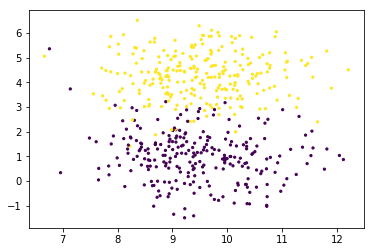

In [26]:
plt.scatter(X[:,0], X[:,1], c=y, s=5)
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Training set has", len(X_train), "points.")
print("Test     set has", len(X_test), "points.")

# then we can create a model
model = LogisticRegression()
model.fit(X_train, y_train)
print("Model accuracy:", model.score(X_test, y_test))

Training set has 375 points.
Test     set has 125 points.
Model accuracy: 0.928


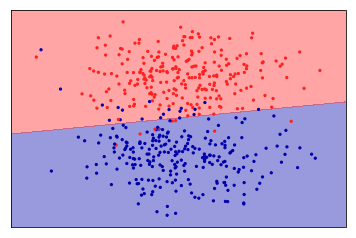

In [32]:
plot_2d_separator(model, X, y, fill=True, eps=0.5, alpha=0.4)